<a href="https://colab.research.google.com/github/Benzin4/computer_math_hw/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%965_%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B0_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №5. Библиотека Pandas. Визуальный анализ данных

## Комплексное задание №1. Применение основных методов для анализа данных

1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/drive/1SLqmaYz4xEsxVV-LGwb3ityheBTzHJQu?usp=sharing)
- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с Вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [5]:
%matplotlib inline
import pandas as pd
pd.__version__

'1.5.3'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [6]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values=' ?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [7]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [8]:
rows, column = df.shape
print(f'Строк - {rows}\nКолонок - {column}')

Строк - 32561
Колонок - 15


3) Какие типы данных у элементов этого датасета?

In [9]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


4) Какие признаки имеют пропуски?

In [10]:
none = df.columns[df.isna().any()].tolist()
print('Столбцы датасета, содержащие пропуски:\n', none)

Столбцы датасета, содержащие пропуски:
 ['workclass', 'occupation', 'native.country']


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ: Я считаю, пропуски значений связаны с отдельными пользователями, не сообщившими информацию о работе (workklass, occupation), местом рождения (native.country) по тем или иным личным причинам, отсутсвием возможности придать данную информацию огласке.

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [11]:
different = df['workclass'].dropna().unique()
print('Различные рабочие классы в "workclass":\n', different)
print('Количество различных рабочих классов: ', len(different))

Различные рабочие классы в "workclass":
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
Количество различных рабочих классов:  8


7) Какой средний возраст женщин и мужчин?

In [12]:
mean_age = df.groupby('sex')['age'].mean()
print(f"Средний возраст женщин и мужчин: {mean_age}")

Средний возраст женщин и мужчин: sex
 Female    36.858230
 Male      39.433547
Name: age, dtype: float64


8) Постройте гистограмму(bar) распределения образования людей (education)

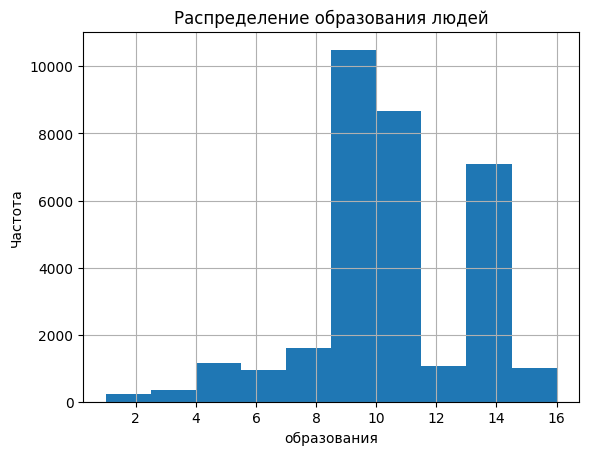

In [13]:
import matplotlib.pyplot as plt

df['education.num'].hist()
plt.xlabel('образования')
plt.ylabel('Частота')
plt.title('Распределение образования людей')
plt.show()

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак income) и тех, кто получает менее 50K в год?

In [14]:
statistics_by_income = df.groupby('income')['age'].agg(['mean', 'std'])
print(statistics_by_income)

             mean        std
income                      
 <=50K  36.783738  14.020088
 >50K   44.249841  10.519028


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [15]:
greather_50 = df[df['income'] == ' >50K']
total_high_income, _ = greather_50.shape

education_levels = [' Bachelors', ' Prof-school', ' Assoc-acdm', ' Assoc-voc', ' Masters', ' Doctorate']
educated_high_income = greather_50[greather_50['education'].isin(education_levels)]
total_educated_high_income, _ = educated_high_income.shape

print('Общее количество людей с доходом более 50K:', total_high_income)
print('Количество людей с высшим образованием и доходом более 50K:', total_educated_high_income)
print(f'Количество людей с доходом более 50K без высшего образования: {total_high_income - total_educated_high_income}')
print('Вывод: Это не подтверждается')


Общее количество людей с доходом более 50K: 7841
Количество людей с высшим образованием и доходом более 50K: 4535
Количество людей с доходом более 50K без высшего образования: 3306
Вывод: Это не подтверждается


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [16]:
married_filter = [' Married-civ-spouse', ' Married-spouse-absent', ' Married-AF-spouse']
maried_people = greather_50[greather_50['marital.status'].isin(married_filter)]
idle_people = greather_50[greather_50['marital.status'].isin(married_filter)]

married_rows, _ = maried_people.shape
idle_rows, _ = idle_people.shape
print('Женатые:', married_rows)
print('Холостые:', idle_rows)
print('Больше женатых')


Женатые: 6736
Холостые: 6736
Больше женатых


12) Постройте [сводную таблицу](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) для отображения зависимостей среднего времени работы (hours.per.week) с доходом (income) для каждой страны (native.country).  


> Пример фрагмента таблицы:



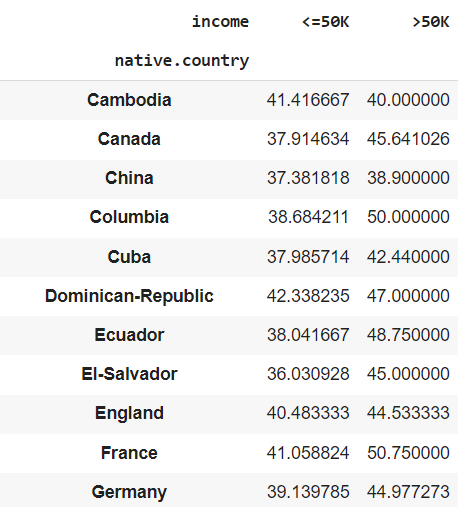

In [17]:
pivot_table = df.pivot_table(values='hours.per.week', index='native.country', columns='income', aggfunc='mean')
print(pivot_table)

income                           <=50K       >50K
native.country                                   
 Cambodia                    41.416667  40.000000
 Canada                      37.914634  45.641026
 China                       37.381818  38.900000
 Columbia                    38.684211  50.000000
 Cuba                        37.985714  42.440000
 Dominican-Republic          42.338235  47.000000
 Ecuador                     38.041667  48.750000
 El-Salvador                 36.030928  45.000000
 England                     40.483333  44.533333
 France                      41.058824  50.750000
 Germany                     39.139785  44.977273
 Greece                      41.809524  50.625000
 Guatemala                   39.360656  36.666667
 Haiti                       36.325000  42.750000
 Holand-Netherlands          40.000000        NaN
 Honduras                    34.333333  60.000000
 Hong                        39.142857  45.000000
 Hungary                     31.300000  50.000000


13) Постройте сводную таблицу для сравнения уровня образования и разности между capital.gain и capital.loss по следующему алгоритму:&nbsp;  
1. Создайте вспомогательную таблицу (датафрейм) и добавьте в неё столбец "education" из целевой таблицы
2. Добавьте во вспомогательную таблицу ещё один столбец "capital.diff", значиниями которого будут являться разности столбцов capital.gain и capital.loss целевой таблицы
3. Удалите во вспомогательной таблице все строки, в которых значение столбца "capital.diff" равно нулю  
&nbsp; Подсказка:
```
summary_table = summary_table[summary_table['capital.diff'] != 0 ]
```
4. Для набора значений из столбца "capital.diff", необходимо сформировать 10 категорий (кластеров), это можно сделать с помощью математических функций, типа log, извлечение корня N-ой степени и округления, для последующего перехода к категориальным признакам.  
  * В нашем случае, можно воспользоваться методом [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) и равномерно разделить наш набор данных на целевое количество категорий
5. Добавьте во вспомогательную таблицу столбец "categories", и проинициализируйте его значениями категорий, которые возвращает метод pd.qcut()  
&nbsp; Пример:
```
summary_table['categories'] = pd.qcut(summary_table["capital.diff"], q = 10)

6. Постройте сводную таблицу с помощью метода pivot_table(),

Примерная структура таблицы (в качестве значений выводится количество людей, относящихся к той или иной группе):

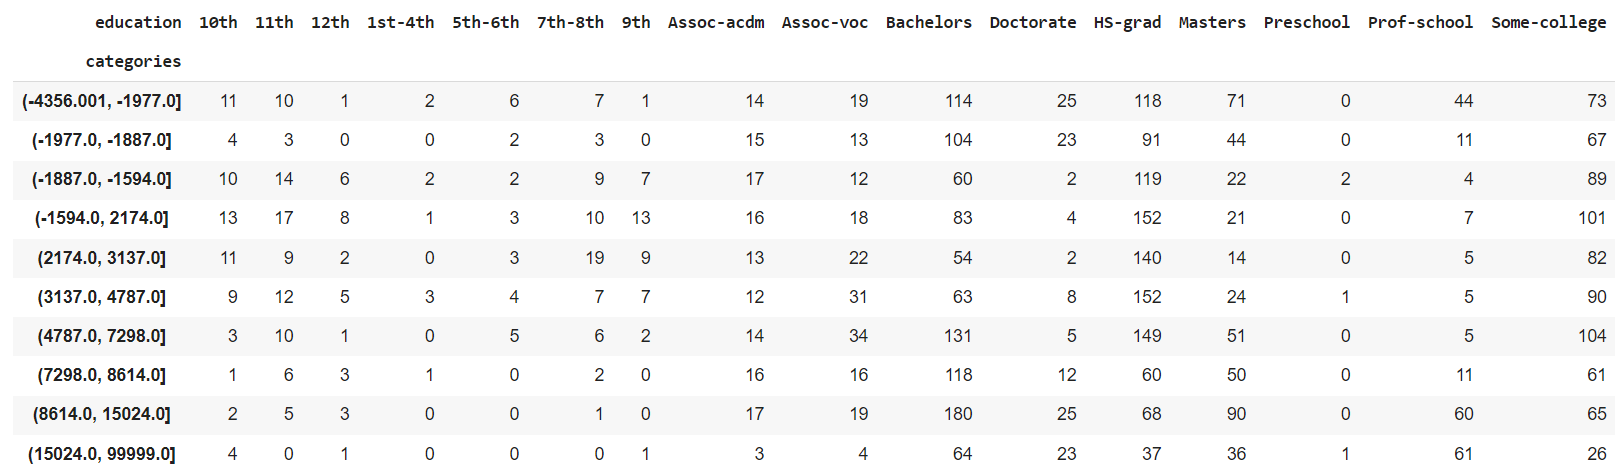

In [18]:
gain_loss_comp = pd.DataFrame()
gain_loss_comp['education'] = df['education']
gain_loss_comp['capital.diff'] = df['capital.gain'] - df['capital.loss']
gain_loss_comp = gain_loss_comp[gain_loss_comp['capital.diff'] != 0 ]
gain_loss_comp['categories'] = pd.qcut(gain_loss_comp["capital.diff"], q = 10)
gain_loss_comp.pivot_table(values="capital.diff", columns="education", index="categories", aggfunc='count')

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
categories,,,,,,,,,,,,,,,,
"(-4356.001, -1977.0]",11,10,1,2,6,7,1,14,19,114,25,118,71,0,44,73
"(-1977.0, -1887.0]",4,3,0,0,2,3,0,15,13,104,23,91,44,0,11,67
"(-1887.0, -1594.0]",10,14,6,2,2,9,7,17,12,60,2,119,22,2,4,89
"(-1594.0, 2174.0]",13,17,8,1,3,10,13,16,18,83,4,152,21,0,7,101
"(2174.0, 3137.0]",11,9,2,0,3,19,9,13,22,54,2,140,14,0,5,82
"(3137.0, 4787.0]",9,12,5,3,4,7,7,12,31,63,8,152,24,1,5,90
"(4787.0, 7298.0]",3,10,1,0,5,6,2,14,34,131,5,149,51,0,5,104
"(7298.0, 8614.0]",1,6,3,1,0,2,0,16,16,118,12,60,50,0,11,61
"(8614.0, 15024.0]",2,5,3,0,0,1,0,17,19,180,25,68,90,0,60,65


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [19]:
filtered_df_female_more_50 = df[(df['sex'] == ' Female') & (df['income'] == ' >50K')]
country_counts = filtered_df_female_more_50.groupby('native.country').size()
sorted_count = country_counts.sort_values(ascending=False)

print(f'Женщины из США получают большую зарплату \n {sorted_count}')

Женщины из США получают большую зарплату 
 native.country
 United-States         1072
 Philippines             12
 Canada                   9
 Germany                  7
 England                  6
 Japan                    5
 China                    5
 Italy                    5
 Taiwan                   4
 Cuba                     3
 France                   3
 South                    3
 Mexico                   2
 Dominican-Republic       2
 India                    2
 Iran                     2
 Puerto-Rico              2
 Portugal                 2
 Poland                   2
 Vietnam                  1
 Thailand                 1
 Scotland                 1
 Greece                   1
 Nicaragua                1
 Haiti                    1
 Laos                     1
 El-Salvador              1
 Jamaica                  1
 Ireland                  1
 Hungary                  1
 Hong                     1
 Honduras                 1
 Yugoslavia               1
dtype: int64


15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [20]:
import numpy as np

df['magic_salary'] = np.where(df['income'] == ' <50K',
                              np.random.randint(0, 51, size=len(df)),
                              np.random.randint(51, 201, size=len(df)))

df['hourly_salary'] = df['magic_salary'] / (df['hours.per.week'] * 52)

salary_per_hour = df.groupby('education')['hourly_salary'].mean()

print('Зарплата в час для людей с одним уровнем образования:\n', salary_per_hour)

mean_magic_salary = df.groupby('education')['magic_salary'].mean()

print('\nзарплата в год людей с одним уровнем образования:\n', mean_magic_salary)

Зарплата в час для людей с одним уровнем образования:
 education
 10th            0.092375
 11th            0.098514
 12th            0.079973
 1st-4th         0.079295
 5th-6th         0.070359
 7th-8th         0.082531
 9th             0.081705
 Assoc-acdm      0.077599
 Assoc-voc       0.070540
 Bachelors       0.065680
 Doctorate       0.071384
 HS-grad         0.070263
 Masters         0.069931
 Preschool       0.075861
 Prof-school     0.063292
 Some-college    0.076596
Name: hourly_salary, dtype: float64

зарплата в год людей с одним уровнем образования:
 education
 10th            124.700965
 11th            129.128511
 12th            123.762125
 1st-4th         126.833333
 5th-6th         124.102102
 7th-8th         125.735294
 9th             125.745136
 Assoc-acdm      125.006560
 Assoc-voc       125.378437
 Bachelors       125.627077
 Doctorate       129.462470
 HS-grad         125.603085
 Masters         126.008125
 Preschool       118.901961
 Prof-school     125.326389
 

## Комплексное задание №2. Визуальный анализ данных. Часть 1

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

В этом задании Вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите самостоятельно(!), с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/romovpa/ml-course-hse/master/bikes_rent.csv')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

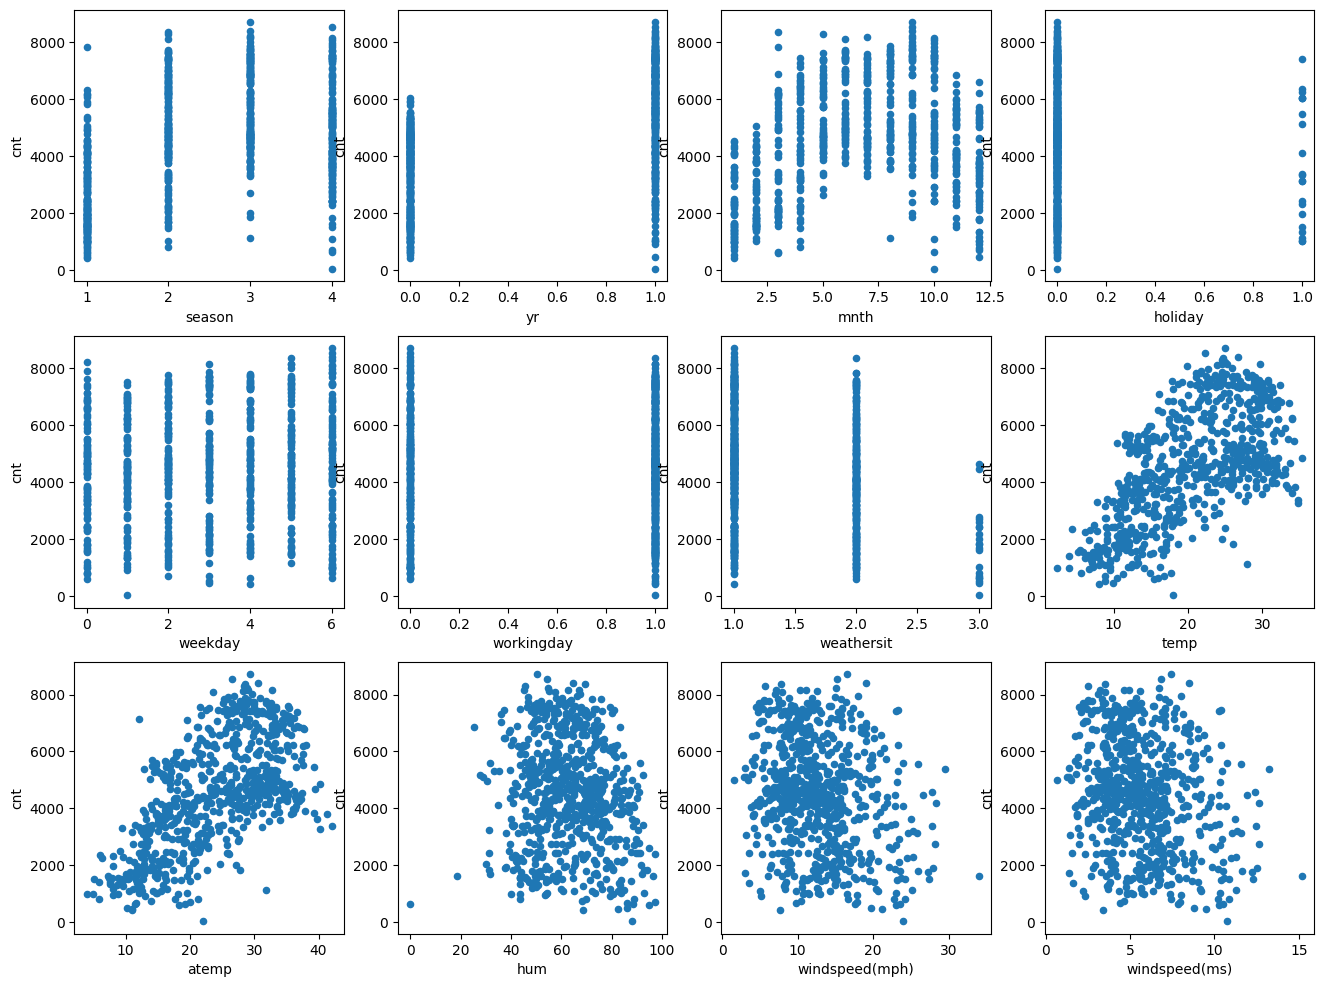

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

### 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?





ответ: Весной и летом число прокатов значительно увеличивается по сравнению с змними месяцами (с минимального значения в 4100 прокатов в день в январе до 8000 в августе). Также осенью количество прокатов в день уменьшается, несмотря, что наибольшее количество в сентябре (около 9000). Таким образом, данные напрямую зависят от времени года и конкретного месяца велосипедного сезона.

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.



Ответ: Число прокатов скорее всего линейно зависит от температуры (temp), ощущаемой температуры (atemp) и времени года (season).

### 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.



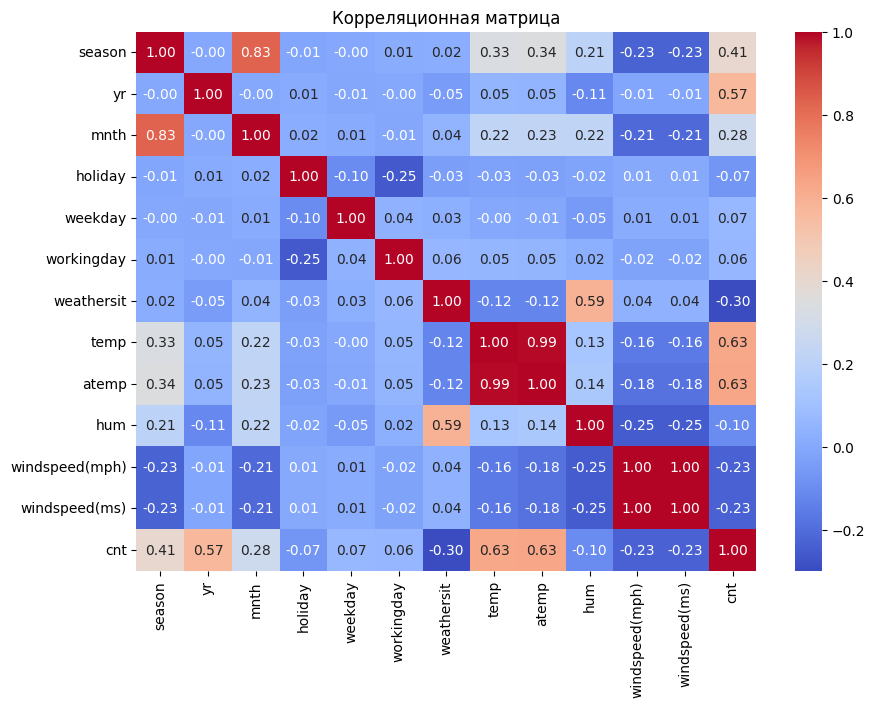

In [40]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Корреляционная матрица')
plt.show()

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ: меньше всего прокат коррелирует с прогнозом погоды, уровнем ветра (mph), уровнем ветра (ms). Больше всего коррелирует с температурой (temp), температурой по ощущениям (atemp), годом (yr) и временем года (season).

### 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)



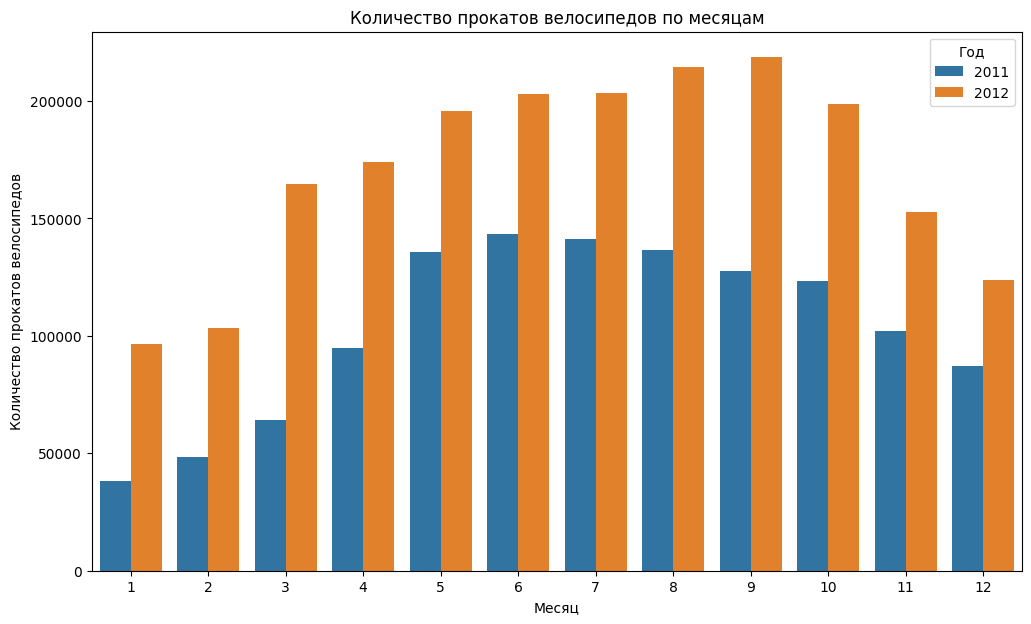

In [41]:
group = df.groupby(['yr', 'mnth'], as_index=False)['cnt'].sum()

group['yr'] = group['yr'].map({0: '2011', 1: '2012'})

plt.figure(figsize=(12, 7))
sns.barplot(x='mnth', y='cnt', hue='yr', data=group)

plt.xlabel('Месяц')
plt.ylabel('Количество прокатов велосипедов')
plt.title('Количество прокатов велосипедов по месяцам')
plt.legend(title='Год')

plt.show()

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: Вероятнее всего, в 2012 году прокат стал более популярным, так как температура была выше.

### 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,



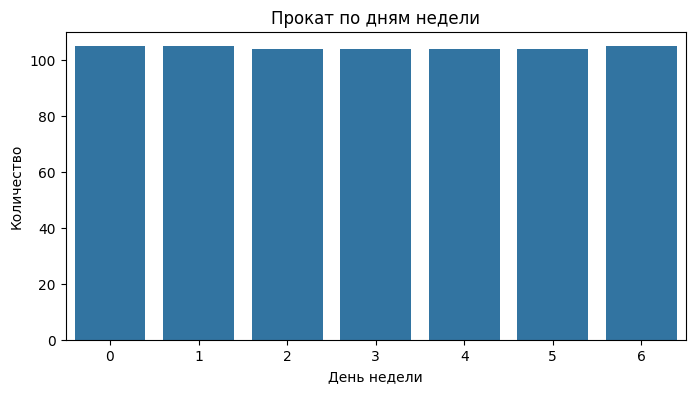

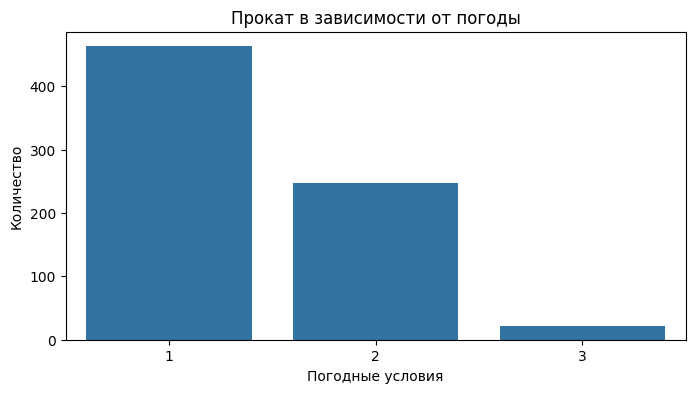

In [42]:
plt.figure(figsize=(8, 4))
sns.countplot(x='weekday', data=df)
plt.title('Прокат по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='weathersit', data=df)
plt.title('Прокат в зависимости от погоды')
plt.xlabel('Погодные условия')
plt.ylabel('Количество')
plt.show()

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.



Ответ: Датасет формировался в течении двух лет, а данные собирались из различных источников. Исходя из графика по дням недели, можно заключить, что аренда была актуальна во все дни, хотя логично было бы предположить, что она должна быть выше в выходные дни. График проката в зависимости от погоды свидетельствует о том, что прокатом пользовались гораздо чаще при благоприятной погоде.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

  
Ответ: Равномерное распределение значений weekday называется однородным.

### 5. Распределение

Постройте распределение целевого признака.


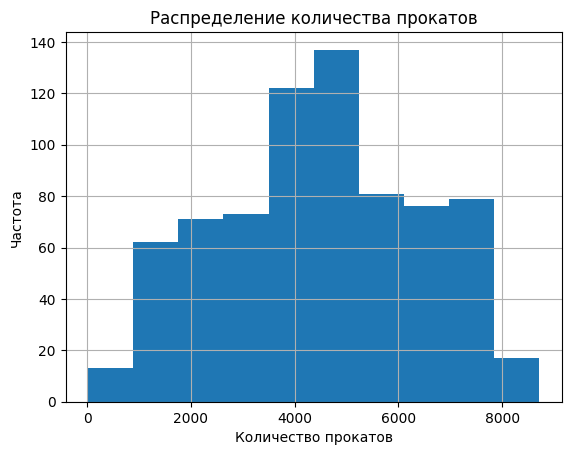

In [43]:
df['cnt'].hist(bins=10)
plt.title('Распределение количества прокатов')
plt.xlabel('Количество прокатов')
plt.ylabel('Частота')
plt.show()


**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

Ответ: Основываясь на графике, в среднем, в день было около 4000-4500 прокатов

### 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.



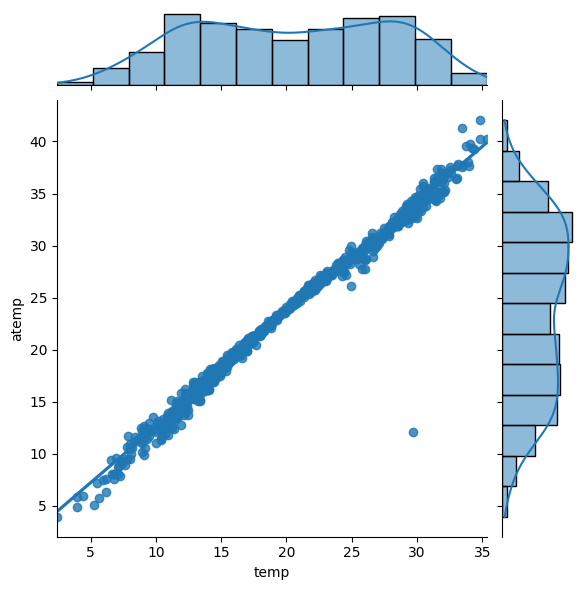

In [25]:
sns.jointplot(x='temp', y='atemp', data=df, kind='reg')

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: Ощущаемая температура (atemp) в среднем выше, чем температура (temp). Это может быть связано с другими показателями, как сила ветра, влажность, облачность и т.д. В некоторых местах ощущаемая температура была ниже относительной, это может быть связано с вышеупомянутыми причинами, однако сильное расхождение настораживает.

### 7. Боксплот (ящик с усами)

Постройте график распределения (боксплот) количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.




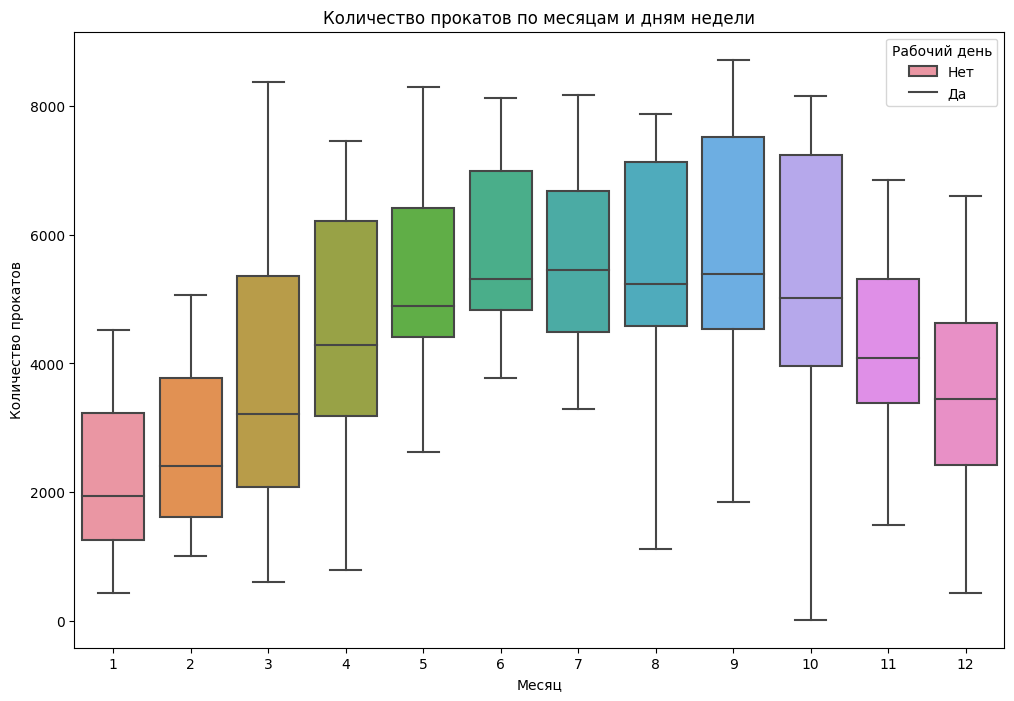

In [26]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='mnth', y='cnt', data=df)
plt.title('Количество прокатов по месяцам и дням недели')
plt.xlabel('Месяц')
plt.ylabel('Количество прокатов')
plt.legend(title='Рабочий день', labels=['Нет', 'Да'])
plt.show()

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.

Ответ: Такое распределение говорит о том, что чем выше температура (весна-лето-ранняя осень), тем чаще прокат используют и в будние дни, например, вечером, так как погода позволяяет, либо используется как транспорт передвижения по городу.

## Комплексное задание №3. Визуальный анализ данных. Часть 2

In [48]:
!pip install seaborn==0.11.0
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [1]:
colab = True # если работаете на своём компьютере, в локальной среде, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


В этом задании Вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

Исходные данные загрузите самостоятельно!

In [27]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/StudentsPerformance.csv')
else:
    df = pd.read_csv("../../data/StudentsPerformance.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Ход задания:

#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


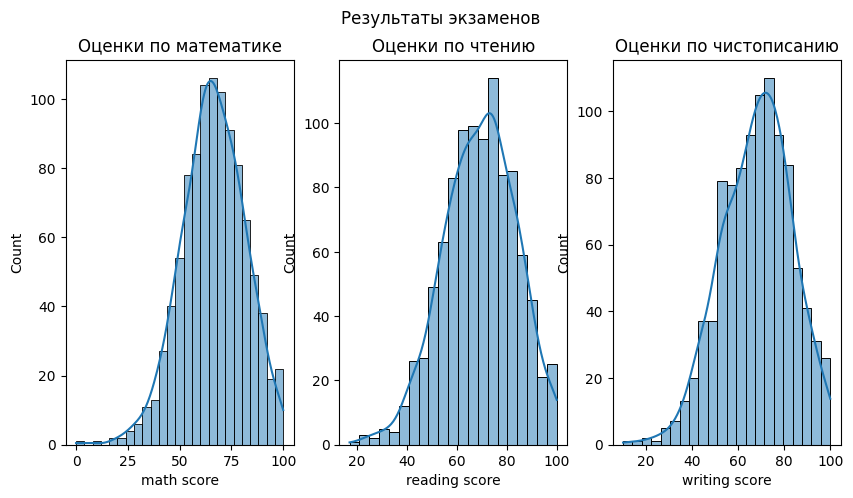

Медиана по математике 66.0
Медиана по чтению 70.0
Медиана по чистописанию 69.0


In [29]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
fig.suptitle('Результаты экзаменов')

sns.histplot(df['math score'], kde=True, ax=axes[0])
axes[0].set_title('Оценки по математике')

sns.histplot(df['reading score'], kde=True, ax=axes[1])
axes[1].set_title('Оценки по чтению')

sns.histplot(df['writing score'], kde=True, ax=axes[2])
axes[2].set_title('Оценки по чистописанию')

plt.show()

print(f'Медиана по математике {df["math score"].median()}\nМедиана по чтению {df["reading score"].median()}\nМедиана по чистописанию {df["writing score"].median()}')

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


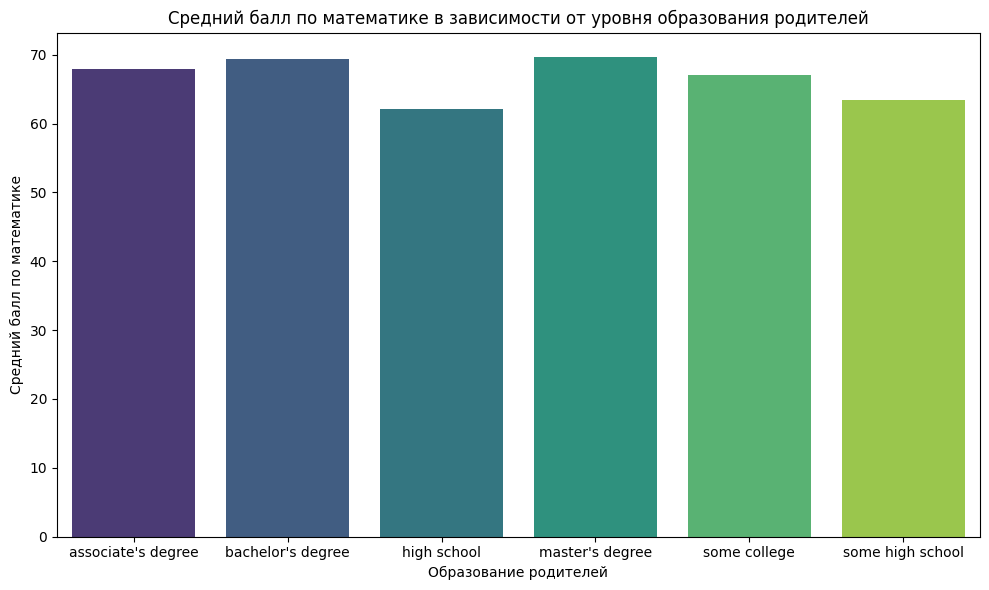

Средние значения баллов у детей в зависимости от образования родителей:
 parental level of education
associate's degree    67.0
bachelor's degree     68.0
high school           63.0
master's degree       73.0
some college          67.5
some high school      65.0
Name: math score, dtype: float64

Каждому уровню соответсвует следующее количество строк:
 some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


In [31]:
mean_math_scores = df.groupby('parental level of education')['math score'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_math_scores.index, y=mean_math_scores.values, palette='viridis')
plt.title('Средний балл по математике в зависимости от уровня образования родителей')
plt.xlabel('Образование родителей')
plt.ylabel('Средний балл по математике')
plt.xticks()
plt.tight_layout()
plt.show()

median_scores = df.groupby('parental level of education')['math score'].median()
print('Средние значения баллов у детей в зависимости от образования родителей:\n', median_scores)

count_parent_educ = df['parental level of education'].value_counts()
print('\nКаждому уровню соответсвует следующее количество строк:\n',count_parent_educ)

Ответ: В среднем, по графику и медианным значениям баллов по математике среди студентов можно сказать, что уровень знаний детей зависит от образования родителя.

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [32]:
higher_90_fem = df.loc[(df['gender'] == 'female') & (df['math score'] > 90) & (df['writing score'] > 90) & (df['reading score'] > 90)]
count_higher_90_fem, _ = higher_90_fem.shape

print('Количество студенток, набравших более 90 баллов:', count_higher_90_fem)

Количество студенток, набравших более 90 баллов: 17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [33]:
subject = ['math score', 'reading score', 'writing score']
score = ['min', 'max', 'median']

df.groupby('gender')[subject].agg(score)

math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете  [pd.agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html))

In [34]:
filter = ['gender', 'lunch', 'test preparation course']

df.groupby(filter)[subject].agg('mean')

math score  reading score  \
gender lunch        test preparation course                              
female free/reduced completed                 60.785714      73.428571   
                    none                      52.890756      63.831933   
       standard     completed                 71.131579      79.798246   
                    none                      66.530233      73.386047   
male   free/reduced completed                 65.639344      65.786885   
                    none                      60.609524      59.076190   
       standard     completed                 75.955752      72.601770   
                    none                      69.832512      64.719212   

                                             writing score  
gender lunch        test preparation course                 
female free/reduced completed                    74.371429  
                    none                         61.781513  
       standard     completed                    81.508772  
                    none                         72.967442  
male   free/reduced completed                    65.737705  
                    none                         55.285714  
       standard     completed                    71.982301  
                    none                         61.906404

Ответ: Исходя из данных, можно заключить, что подготовка к тесту значительно влияет на средний бал среди всех учеников. Стандартный обед также положительно влияет на данное значение.

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

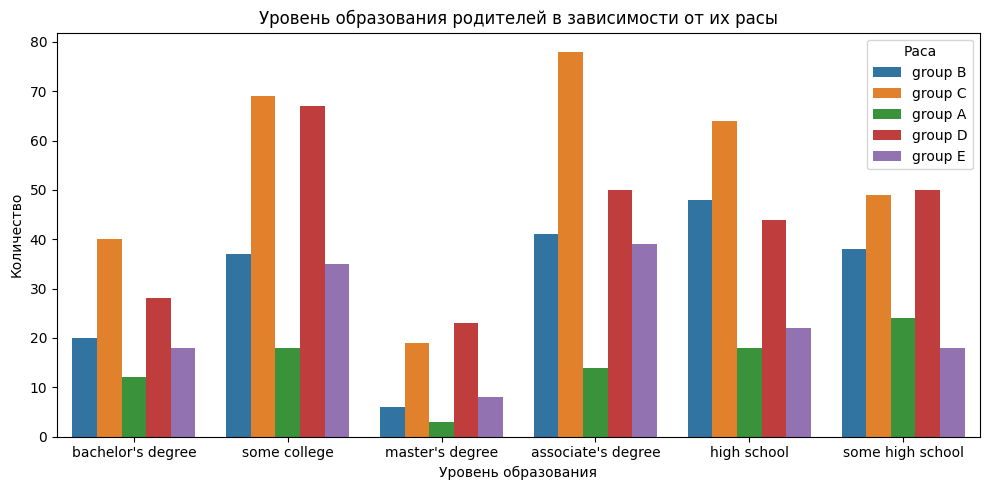

In [37]:
plt.figure(figsize=(10, 5))

sns.countplot(x='parental level of education', hue='race/ethnicity', data=df)

plt.title('Уровень образования родителей в зависимости от их расы')
plt.xlabel('Уровень образования')
plt.ylabel('Количество')
plt.legend(title='Раса')
plt.tight_layout()

plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

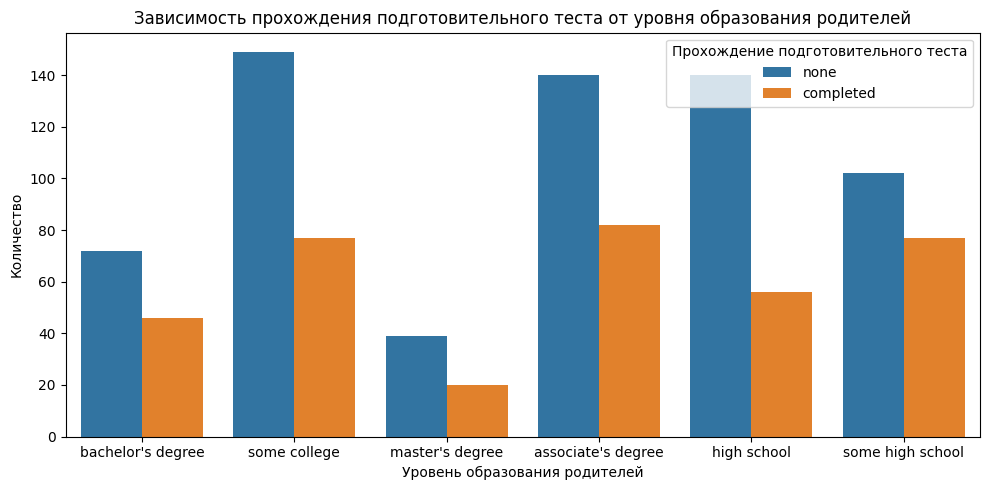

In [38]:
plt.figure(figsize=(10, 5))

sns.countplot(x='parental level of education', hue='test preparation course', data=df)

plt.title('Зависимость прохождения подготовительного теста от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество')
plt.legend(title='Прохождение подготовительного теста')
plt.tight_layout()

plt.show()

Ответ: Дети родителей, закончивших только старшую школу проходят курсы чаще даже в процентном соотношении. Меньший процент детей посещает курсы родители котрых закончили только колледж и получивших базовое высшее образование.

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

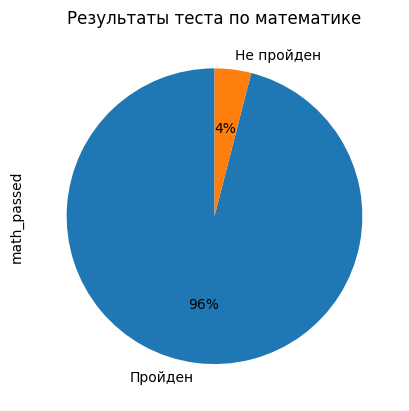

In [41]:
def is_math_passed(value: int) -> int:
    if value >= 40:
        return 1
    else:
        return 0

df['math_passed'] = df['math score'].apply(is_math_passed)
df['math_passed'].value_counts().plot(kind='pie', startangle=90, labels=['Пройден', 'Не пройден'], autopct='%1.0f%%')

plt.title('Результаты теста по математике')

plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

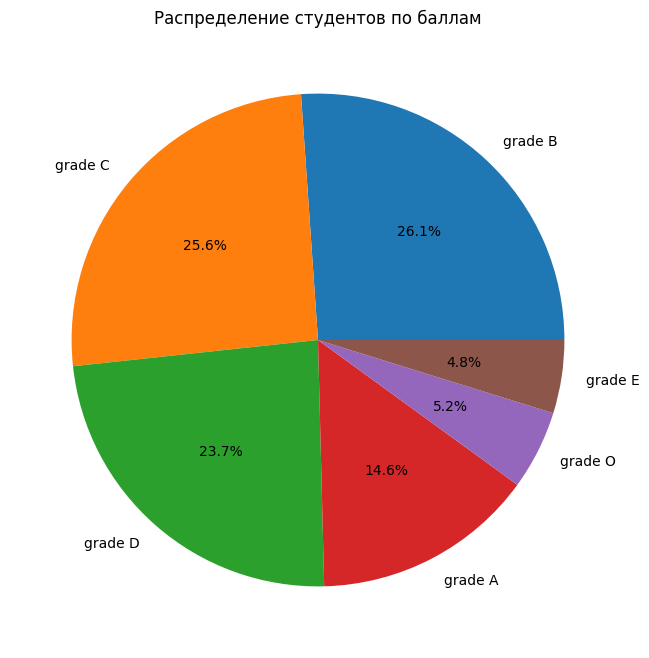

In [42]:
def grading_marks(row) -> str:
    average_mark = (row['math score'] + row['reading score'] + row['writing score']) / 3
    if row['math score'] < 40:
        return 'grade E'
    elif average_mark >= 90:
        return 'grade O'
    elif average_mark >= 80:
        return 'grade A'
    elif average_mark >= 70:
        return 'grade B'
    elif average_mark >= 60:
        return 'grade C'
    elif average_mark >= 41:
        return 'grade D'
    else:
        return 'grade E'

df['grade'] = df.apply(grading_marks, axis=1)

grade_scores = df['grade'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(grade_scores, labels = grade_scores.index, autopct='%1.1f%%')
plt.title('Распределение студентов по баллам')

plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

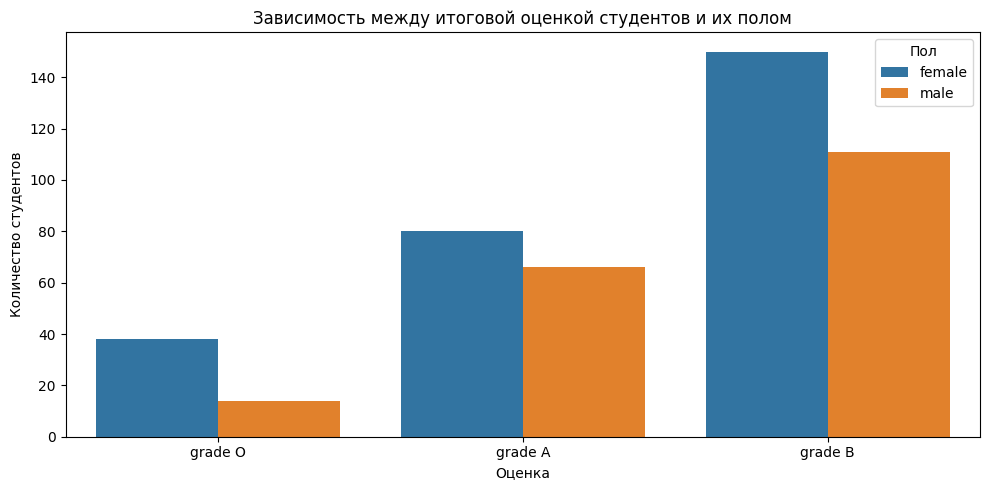

In [44]:
plt.figure(figsize=(10, 5))

sns.countplot(x='grade', hue='gender', data=df, order=['grade O', 'grade A', 'grade B'])
plt.title('Зависимость между итоговой оценкой студентов и их полом')
plt.xlabel('Оценка')
plt.ylabel('Количество студентов')
plt.legend(title='Пол')

plt.tight_layout()
plt.show()